# Data Sensitive Hashing

- Data Sensitive Hashing is a hashing mechanism which like Locality Sensitive Hashing tries to solve the problem of k- Nearest Neighbours in high dimensions. But unlike LSH, DSH directly tries to tackle the problem of k-NN and does not tackle the problem of R-kNN.
- Additionally, DSH takes into account the data distribution. Hence, the buckets of DSH are much more stable and work even the distri
Here we present an analysis of the different kinds of query mechanisms that we implemented in Data Sensitive Hashing

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 20
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

# Non Uniform Dataset

- We use the [Forest Cover Dataset](https://archive.ics.uci.edu/ml/datasets/Covertype) available at UCI Machine Learning Repository for testing our implementation of different query mechanisms on DSH.
- The dataset contains 580K vectors of 54 dimensions and is characterized by a data scew and hence has a non uniform distribution of data which is ideal for testing data sensitive hashing.
- Parameters:
    - BaseR: 20 (for DSH) and 50 (for LSH)
    - Round of collision counting : 10
    - Datasize: 580K
    - Querysize: 1000
    - Dimensions (D): 54
    - K-NN Neighbours (K): 20
    - Number of Hashtables (L) : 50
    - Random Hash functions (M) : 20

In [31]:
lsh = pd.read_csv('lsh.csv')
dsh = pd.read_csv('dsh.csv')
entropy = pd.read_csv('entropy.csv')
multiprobe = pd.read_csv('multiprobe.csv')

## Width Parameter for LSH

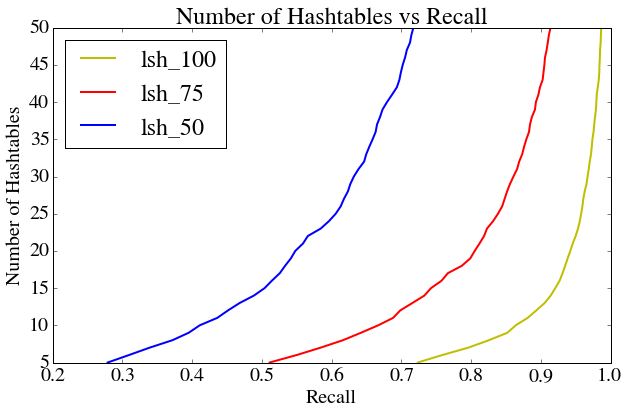

In [32]:
lsh_50 = pd.read_csv('lsh_50.csv')
lsh_75 = pd.read_csv('lsh_75.csv')

plt.title('Number of Hashtables vs Recall')
plt.xlabel('Recall')
plt.ylabel('Number of Hashtables')
plot0, = plt.plot(lsh['recall'], lsh['Lused'], 'y')
plot1, = plt.plot(lsh_75['recall'], lsh_75['Lused'], 'r')
plot2, = plt.plot(lsh_50['recall'], lsh_50['Lused'], 'b')
plt.legend([plot0, plot1, plot2], ['lsh_100', 'lsh_75', 'lsh_50'], loc=2)

**Sailent Points:**

- The above plot shows the importance of the selection of a correct width parameter for LSH and how much it can affect recall. 
- DSH on the other hand chooses the correct width parameter automatically and hence performs the best possible in case the data is skewed.
- For all further analysis we choose the LSH with highest possible width parameter of 100.

## Recall vs Hashtables

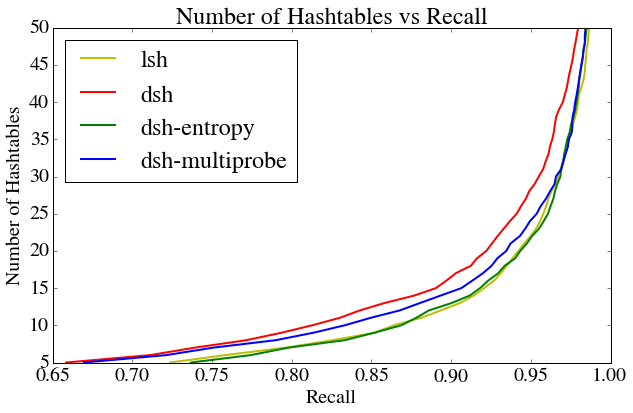

In [33]:
plt.title('Number of Hashtables vs Recall')
plt.xlabel('Recall')
plt.ylabel('Number of Hashtables')
plot0, = plt.plot(lsh['recall'], lsh['Lused'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['Lused'], 'r')
plot2, = plt.plot(entropy['recall'], entropy['Lused'], 'g')
plot3, = plt.plot(multiprobe['recall'], multiprobe['Lused'], 'b')
plt.legend([plot0, plot1, plot2, plot3], ['lsh', 'dsh', 'dsh-entropy', 'dsh-multiprobe'], loc=2)

- The graph clearly shows that dsh-entropy and dsh-multiprobe perform better using a lesser number of hashtables as compared to lsh and dsh. This observation allows us to potentially save computation by using a lower number of hash tables.

## Average Time Taken by the different Querying Mechanisms

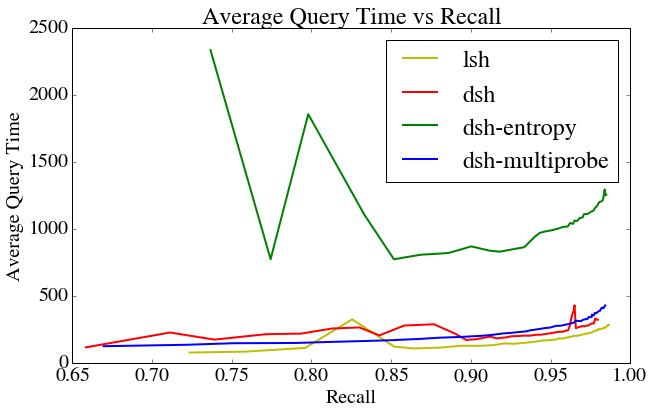

In [34]:
lsh['avg-time'] = lsh['time'] / 1000
dsh['avg-time'] = dsh['time'] / 1000
entropy['avg-time'] = entropy['time'] / 1000
multiprobe['avg-time'] = multiprobe['time'] / 1000

plt.title('Average Query Time vs Recall')
plt.xlabel('Recall')
plt.ylabel('Average Query Time')
plot0, = plt.plot(lsh['recall'], lsh['avg-time'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['avg-time'], 'r')
plot2, = plt.plot(entropy['recall'], entropy['avg-time'], 'g')
plot3, = plt.plot(multiprobe['recall'], multiprobe['avg-time'], 'b')
plt.legend([plot0, plot1, plot2, plot3], ['lsh', 'dsh', 'dsh-entropy', 'dsh-multiprobe'])

**Sailent Points**

- DSH-Entropy which requires perturbation of the query point and recomputation of the K-Nearest Neighbours for every perturbation, quite obviously takes the most time of the lot.
- DSH and DSH multiprobe take approximately the same time, this is because of the effectiveness of DSH which ensures that most of the nearby points are already in the same bucket and hence multiprobing does not add any new results.
- LSH performs worse than DSH because of the data skew. As the data is not evenly distributed, LSH has to visit much more points to get the same recall as DSH.

## Recall vs Average Points Checked

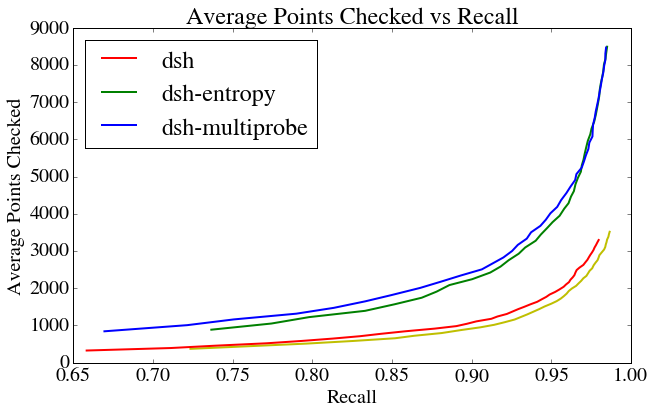

In [35]:
lsh['avg-points'] = lsh['points'] / 1000
dsh['avg-points'] = dsh['points']
entropy['avg-points'] = entropy['points'] / 1000
multiprobe['avg-points'] = multiprobe['points'] / 1000

plt.title('Average Points Checked vs Recall')
plt.xlabel('Recall')
plt.ylabel('Average Points Checked')
plot0, = plt.plot(lsh['recall'], lsh['avg-points'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['avg-points'], 'r')
plot2, = plt.plot(entropy['recall'], entropy['avg-points'], 'g')
plot3, = plt.plot(multiprobe['recall'], multiprobe['avg-points'], 'b')
plt.legend([plot1, plot2, plot3], ['dsh', 'dsh-entropy', 'dsh-multiprobe'], loc=2)

**Sailent Points**

- The high number of points checked for LSH comes in light of the fact that the data is skewed and hence the buckets are not unifrom.
- Both dsh-entropy and dsh-multiprobe make use of additional queries for each querypoint and as a consequence visit more number of points per query.
- DSH is the best which means that it is very effective and does not need to check additional points.

## Recall vs Hitrate

- Hitrate measures how accurate the search is, a better hitrate means that we get good results by looking at very few points

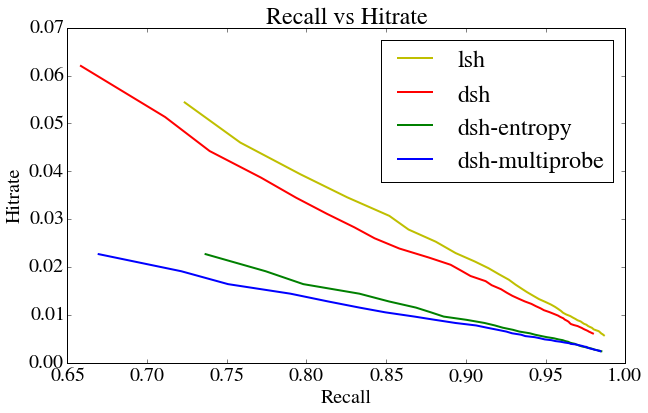

In [36]:
lsh['hitrate'] = 20/lsh['avg-points']
dsh['hitrate'] = 20 / dsh['avg-points']
entropy['hitrate'] = 20 / entropy['avg-points']
multiprobe['hitrate'] = 20 / entropy['avg-points']

plt.title('Recall vs Hitrate')
plt.xlabel('Recall')
plt.ylabel('Hitrate')
plot0, = plt.plot(lsh['recall'], lsh['hitrate'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['hitrate'], 'r')
plot2, = plt.plot(entropy['recall'], entropy['hitrate'], 'g')
plot3, = plt.plot(multiprobe['recall'], multiprobe['hitrate'], 'b')
plt.legend([plot0, plot1, plot2, plot3], ['lsh', 'dsh', 'dsh-entropy', 'dsh-multiprobe'])

- This discussion is a corollary of the previous discussion as if the number of points to get a good recall is low, then the hitrate of the algorithm is high

# Uniform Dataset

- We generated 100000 vectors of 20 dimensions for the purpose of this analysis.
- Parameters:
    - BaseR: 1.1
    - Round of collision counting : 10
    - Datasize: 100K
    - Querysize: 100
    - Dimensions (D): 20
    - K-NN Neighbours (K): 20
    - Number of Hashtables (L) : 50
    - Random Hash functions (M) : 20

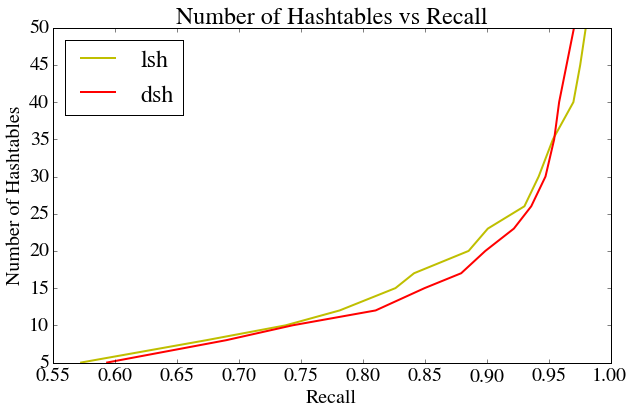

In [37]:
lsh = pd.read_csv('lsh-unif.csv')
dsh = pd.read_csv('dsh-unif.csv')

plt.title('Number of Hashtables vs Recall')
plt.xlabel('Recall')
plt.ylabel('Number of Hashtables')
plot0, = plt.plot(lsh['recall'], lsh['Lused'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['Lused'], 'r')
plt.legend([plot0, plot1], ['lsh', 'dsh'], loc=2)

## Average Query Time vs Recall

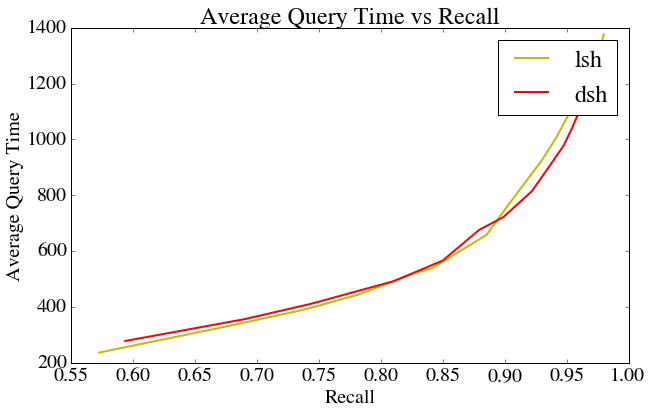

In [38]:
lsh['avg-time'] = lsh['time'] / 1000
dsh['avg-time'] = dsh['time'] / 1000

plt.title('Average Query Time vs Recall')
plt.xlabel('Recall')
plt.ylabel('Average Query Time')
plot0, = plt.plot(lsh['recall'], lsh['avg-time'], 'y')
plot1, = plt.plot(dsh['recall'], dsh['avg-time'], 'r')
plt.legend([plot0, plot1], ['lsh', 'dsh'])